# Linear Regression

In this notebook, I combine the single neuron model from the previous notebook together with the gradient descent algorithm in order to solve a linear regression problem, focusing on single variable regression for a single species of penguin in the readily available palmer_penguins dataset.

Based off of the figure generated by the code below, one could reasonably suspect that a linear relationship exists when considering the palmer_penguins dataset Chinstrap species flipper length as feature measurements together with the palmer_penguins dataset Chinstrap species body mass as targets.

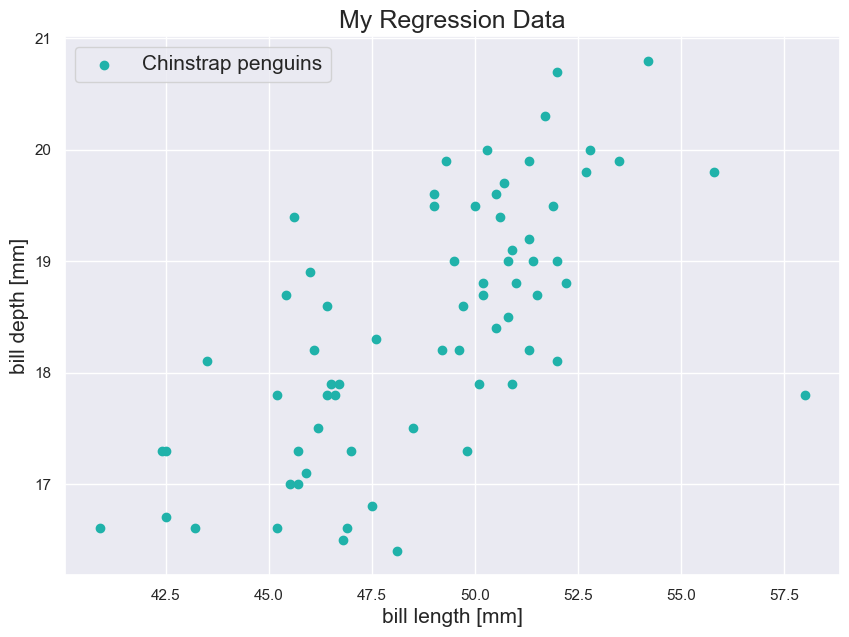

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

df = pd.read_csv("Datasets/palmer_penguins.csv")
df = df.iloc[151:219][["bill_length_mm", "bill_depth_mm"]]

plt.figure(figsize = (10, 7))
plt.scatter(df.bill_length_mm, df.bill_depth_mm, color = "lightseagreen", label = "Chinstrap penguins")
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

For this implementation of a single neuron model, stochastic gradient descent was used to optimize the weights and bias by minimizing the cost function. Stochastic gradient descent was implemented with the ```train``` method used in the following custom ```SingleNeuron``` class.

In [2]:
class SingleNeuron(object):
    """
    Single neuron model using gradient descent for training.

    This class simulates a single artificial neuron that learns to map input 
    features to outputs using a specified activation function and gradient 
    descent-based weight updates.

    Attributes:
        activation_function (callable): The activation function applied to the neuron's output.
        w_ (ndarray): Weight vector including the bias term.
        errors_ (list): Mean squared error for each training epoch.

    Methods:
        train(X, y, alpha=0.005, epochs=50): Trains the neuron on input data using gradient descent.
        predict(X): Computes the neuron's output for a given input using the activation function.
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    # Gradient Descent
    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

Now that the custom ```SingleNeuron``` class has been defined, the data must be prepared for training.

In [3]:
X = df.bill_length_mm.values
X = X.reshape(-1, 1)
y = df.bill_depth_mm.values

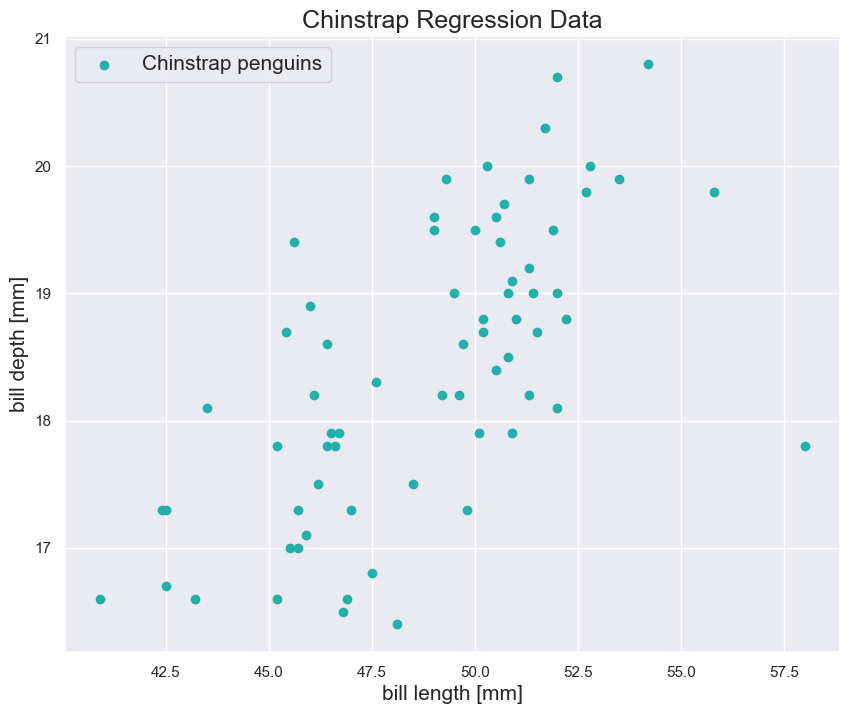

In [4]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Chinstrap penguins")
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Chinstrap Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

In order to instantiate a given instance the```SingleNeuron``` model, an activation function needs to be defined first. After doing so, a ```SingleNeuron``` object can be instantiated. After creating this ```SingleNeuron```, it can then be trained by calling the ```train()``` method with input ```X``` and ```y```. Once an instance of the ```SingleNeuron``` class has been created and the train method has been called, the linear regression line can be visualized by scatter plotting the data and also plotting the predicted output over some domain within the range of values of input features.

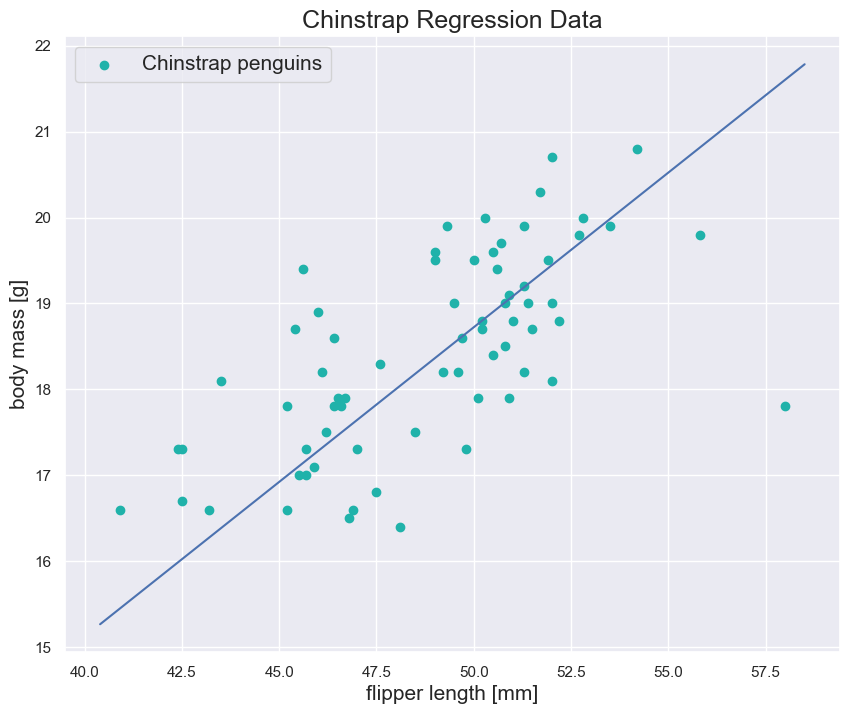

In [5]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0001, epochs = 5)

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Chinstrap penguins")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("flipper length [mm]", fontsize = 15)
plt.ylabel("body mass [g]", fontsize = 15)
plt.title("Chinstrap Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

The ```errors_``` attribute that we stored while training can now be plotted. Note that the $i$-th entry of the ```errors_``` attribute is the *mean-sqaured error* of the neuron after the $i+1$ epoch of stochastic gradient descent.

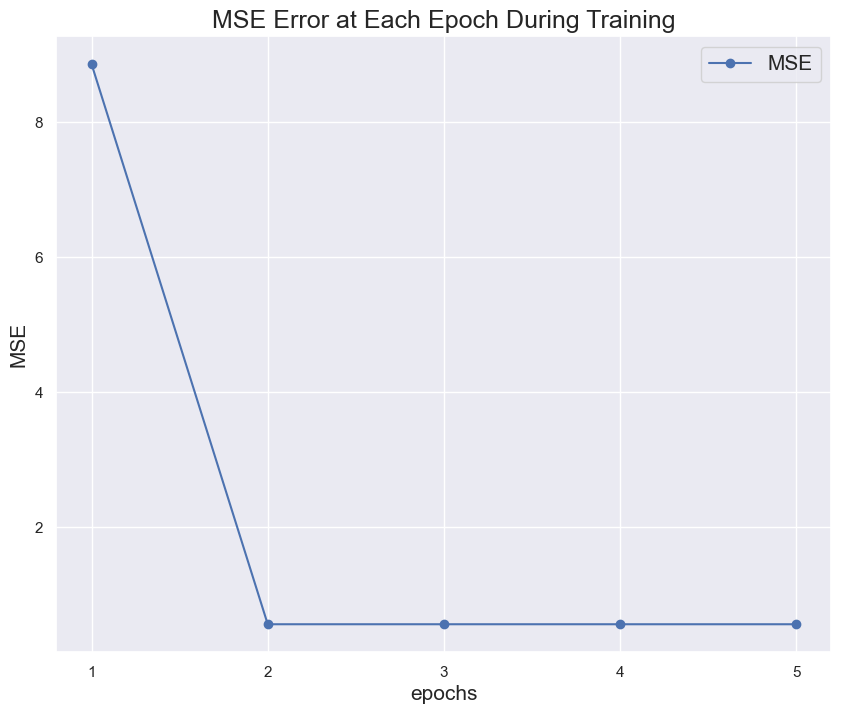

In [6]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), node.errors_, marker = "o", label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

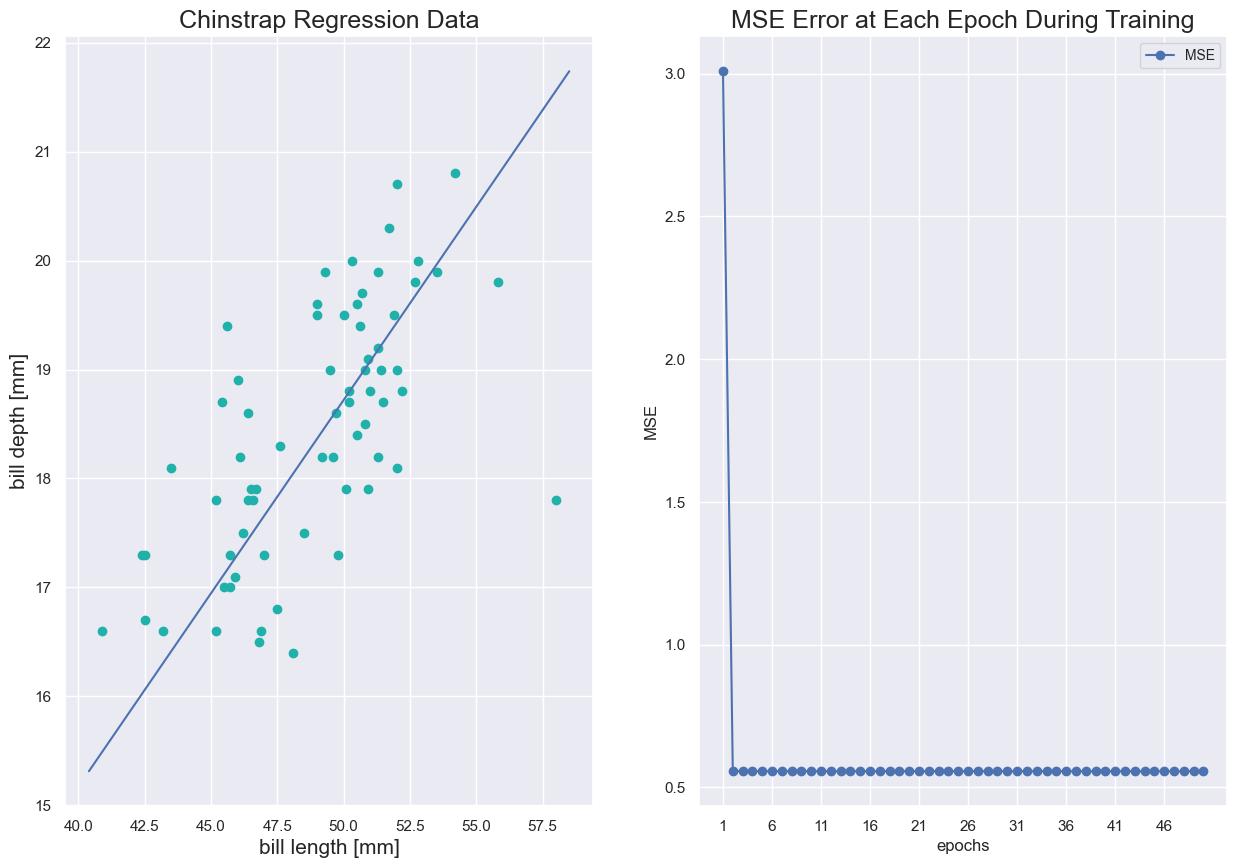

In [7]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("bill length [mm]", fontsize = 15)
ax1.set_ylabel("bill depth [mm]", fontsize = 15)
ax1.set_title("Chinstrap Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), node.errors_, marker = "o", label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

Here, the learning rate can be experimented with.

/var/folders/tl/x6_d2czd4fs_z85l1sc3gb8h0000gn/T/ipykernel_72700/277481884.py:33: RuntimeWarning: overflow encountered in scalar power
  errors += .5*(error**2)
/var/folders/tl/x6_d2czd4fs_z85l1sc3gb8h0000gn/T/ipykernel_72700/277481884.py:31: RuntimeWarning: invalid value encountered in subtract
  self.w_[:-1] -= alpha*error*xi
/var/folders/tl/x6_d2czd4fs_z85l1sc3gb8h0000gn/T/ipykernel_72700/277481884.py:32: RuntimeWarning: invalid value encountered in scalar subtract
  self.w_[-1] -= alpha*error


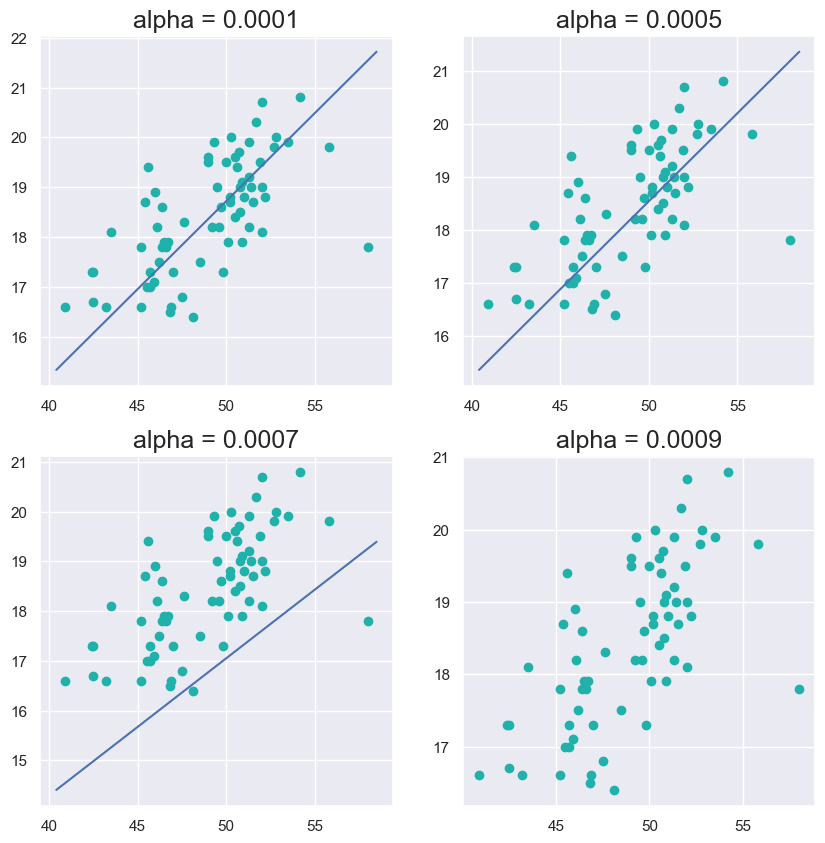

In [8]:
# Possible choices of learning rate 
alphas = [0.0001, 0.0005, 0.0007, 0.0009]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 1_000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)